# Sentiment Analysis using BERT
Bidirectional Encoder Representations from Transformers

In [ ]:
!nvidia-smi

Fri Jul 29 06:52:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 981 kB 57.2 MB/s 
     |████████████████████████████████| 263 kB 35.1 MB/s 
     |████████████████████████████████| 2.8 MB 52.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.6 MB/s 
     |████████████████████████████████| 468 kB 41.0 MB/s 
     |████████████████████████████████| 3.3 MB 37.0 MB/s 
     |████████████████████████████████| 880 kB 43.4 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 101 kB 8.6 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.3-py3-none-any.whl size=25313110 sha256=4f290f13760c8728115b00f37d28725d3c9ea290e7cc169552e83807380ecfd4
  Stored in directory: /root/.cache/pip/wheels/02/b2/23/62848f56f705788e6ad39f23f8c4b8127edbbe9daa14c9c91c
  C

In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.7 MB/s 


In [ ]:
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize, Tokenizer

import numpy as np

import ktrain
from ktrain import text
# from collections import Counter

import seaborn as sn
import matplotlib.pyplot as plt

# import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import string
from string import punctuation

#########################
from pythainlp.corpus.common import thai_words

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from pythainlp.corpus import thai_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())

/content


In [ ]:
data_path = 'drive/My Drive/source'
print(os.listdir(data_path))

['no.csv', '.ipynb_checkpoints', '10005.gsheet', '10005.csv', '9224.csv', '9224k.csv', '9224t.csv', '9224k-nozero (1).csv', 'รวม 10005.xlsx', 'รวม 10005.csv', 'รวม 10005++.xlsx', 'รวม 10005++.csv', 'รวม_10005_more.xlsx', 'รวม_10005_more.csv', 'รวม 10005 - Copy.csv', 'รวม 11046 eng.csv', 'รวม 11046.csv', 'test.csv', 'train_test.csv']


In [ ]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

no.csv
.ipynb_checkpoints
10005.gsheet
10005.csv
9224.csv
9224k.csv
9224t.csv
9224k-nozero (1).csv
รวม 10005.xlsx
รวม 10005.csv
รวม 10005++.xlsx
รวม 10005++.csv
รวม_10005_more.xlsx
รวม_10005_more.csv
รวม 10005 - Copy.csv
รวม 11046 eng.csv
รวม 11046.csv
test.csv
train_test.csv


In [ ]:
import pandas as pd

In [ ]:
file_name = data_path+'/train_test.csv'
file_name

'drive/My Drive/source/train_test.csv'

In [ ]:
df = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,3] ,names=['sentence','level'], header=0)

In [ ]:
df.head()

,sentence,level
0,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,one
1,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,one
2,เปิดมาปีแรก​ ยิมก็จะปิดเพราะ​ covid​ อีกแล้ววว...,one
3,#azumasoba รีบทานก่อนโดนสั่งปิด #โควิด https:/...,one
4,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,one


In [ ]:
df = df.drop_duplicates()

In [ ]:
# zero_df = df[df.level == "zero"].sample(2000)
# zero_df.head()

In [ ]:
# print(len(zero_df))

In [ ]:
one_df = df[df.level == 'one'].sample(1500)
one_df.head()

,sentence,level
3231,@NunaAthiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว,one
3268,กลัวโควิดละ,one
1932,วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...,one
4314,โดนตรวจโควิดอีกแล้ว 😪,one
2888,เราควรเอาวิธีการ handle Avain Influenza มา app...,one


In [ ]:
print(len(one_df))

1500


In [ ]:
two_df = df[df.level == 'two']
two_df.head()

,sentence,level
10,กลัวโควิทกันบ้างไหม #โควิดกรุงเทพ #มีเลย์มีเฮก...,two
25,ไม่อยากไปทำงานเลย\nทำไมออฟฟิสไม่ประกาศให้ WFH ...,two
32,ชีวิตเด็กปี4นี่มันสุดยอดจริงๆ\nเห็นม.อื่นเค้าเ...,two
35,ถ้ารัฐบาล #ประยุทธ์ ไม่สามารถที่จะหาคนทำผิด ใน...,two
55,โควิดก็มา ค่าฝุ่นก็พุ่ง ข้างบ้านก็เผาอะไรนักหน...,two


In [ ]:
print(len(two_df))

1235


In [ ]:
three_df = df[df.level == 'three']
three_df.head()

,sentence,level
426,คือเอาจริงก็อยากไปเรียนที่มอ แต่ยอดคนติดโควิดเ...,three
428,คิดถึงๆร้านเราคึกคักๆๆๆก่อนโควิดลง ตอนนี้ไม่เช...,three
429,@BISKUITGONG กลัวโควิด5555,three
434,โควิดซัด! รถป้ายแดงปี 63 เหลือ 2.6 ล้านคัน ลด ...,three
477,มีทั้งตร. ในม็อบ และนางงาม ที่ติดโควิด-19 ขณะน...,three


In [ ]:
print(len(three_df))

461


In [ ]:
sentiment_df = pd.concat([one_df,two_df,three_df])
sentiment_df.head()

,sentence,level
3231,@NunaAthiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว,one
3268,กลัวโควิดละ,one
1932,วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...,one
4314,โดนตรวจโควิดอีกแล้ว 😪,one
2888,เราควรเอาวิธีการ handle Avain Influenza มา app...,one


In [ ]:
print(len(sentiment_df))

3196


In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['sentence'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,sentence,level,clean_sentence
3231,@NunaAthiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว,one,@nunaathiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว
3268,กลัวโควิดละ,one,กลัวโควิดละ
1932,วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...,one,วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...
4314,โดนตรวจโควิดอีกแล้ว 😪,one,โดนตรวจโควิดอีกแล้ว 😪
2888,เราควรเอาวิธีการ handle Avain Influenza มา app...,one,เราควรเอาวิธีการ handle avain influenza มา app...


In [ ]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_sentence'].str.replace(r'[%s]' % (pun), '', regex=True)

In [ ]:
sentiment_df.sample(5)

,sentence,level,clean_sentence,clean_comments
1892,🗓 วันเสาร์ที่ 6 กุมภาพันธ์ 2564 ⏰เวลา 24.00 น....,two,🗓 วันเสาร์ที่ 6 กุมภาพันธ์ 2564 ⏰เวลา 24.00 น....,🗓 วันเสาร์ที่ 6 กุมภาพันธ์ 2564 ⏰เวลา 2400 น\n...
3009,โควิดไม่กลัวเลย โรคระบาดมันเป็นกันทั้งโลก แต่แ...,two,โควิดไม่กลัวเลย โรคระบาดมันเป็นกันทั้งโลก แต่แ...,โควิดไม่กลัวเลย โรคระบาดมันเป็นกันทั้งโลก แต่แ...
2552,อาทิตย์ที่ผ่านมาในออฟฟิศมีคนติดโควิด 8 คน แล้ว...,three,อาทิตย์ที่ผ่านมาในออฟฟิศมีคนติดโควิด 8 คน แล้ว...,อาทิตย์ที่ผ่านมาในออฟฟิศมีคนติดโควิด 8 คน แล้ว...
2453,1)ขอเล่าการรักษา #โควิด19 ที่บ้าน \nเนื่องจากพ...,two,1)ขอเล่าการรักษา #โควิด19 ที่บ้าน \nเนื่องจากพ...,1ขอเล่าการรักษา โควิด19 ที่บ้าน \nเนื่องจากพี่...
2560,สั่งปิดแม่งทุกอย่าง แต่ไม่ทำอะไรเลย\n\nนี่ถามเ...,two,สั่งปิดแม่งทุกอย่าง แต่ไม่ทำอะไรเลย\n\nนี่ถามเ...,สั่งปิดแม่งทุกอย่าง แต่ไม่ทำอะไรเลย\n\nนี่ถามเ...


In [ ]:
custom_words_list = set(thai_words())
len(custom_words_list)

62051

In [ ]:
st = 'โอเคบ่พวกเรารักภาษาบ้านเกิด'

custom_tokenizer = Tokenizer(custom_words_list)
custom_tokenizer.word_tokenize(st)

['โอเค', 'บ่', 'พวกเรา', 'รัก', 'ภาษา', 'บ้านเกิด']

In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['clean_sentence'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [ ]:
sentiment_df.sample(5)

,sentence,level,clean_sentence,clean_comments
1306,ตุ๊บไปแล้วหนึ่ง\nใครซื้อ #ประกันโควิด ของสินม...,two,"[ตุ๊, บ, ไป, แล้ว, หนึ่ง, \n, ใคร, ซื้อ, , #,...",ตุ๊บไปแล้วหนึ่ง\nใครซื้อ ประกันโควิด ของสินมั...
527,โควิดแม่งเหี้ยจริง เหี้ยจนกูเหนื่อยจนจะร้องไห้...,two,"[โควิด, แม่, ง, เหี้ย, จริง, , เหี้ย, จน, กู,...",โควิดแม่งเหี้ยจริง เหี้ยจนกูเหนื่อยจนจะร้องไห้...
2771,@CatologyTh ร้านลำปาง พังเพราะโควิดหลายร้าน หล...,two,"[@, catologyth, , ร้าน, ลำปาง, , พัง, เพราะ,...",@catologyth ร้านลำปาง พังเพราะโควิดหลายร้าน หล...
2192,การเลือกปฏิบัติโดยการฉีดวัคซีนกำลังมา ขณะที่เร...,one,"[การ, เลือก, ปฏิบัติ, โดย, การ, ฉีดวัคซีน, กำล...",การเลือกปฏิบัติโดยการฉีดวัคซีนกำลังมา ขณะที่เร...
987,ที่คอนโดมีคนติดโควิดแล้วจ้า เป็นตั้งแต่เดือนที...,two,"[ที่, คอนโด, มี, คน, ติด, โควิด, แล้ว, จ้า, ,...",ที่คอนโดมีคนติดโควิดแล้วจ้า เป็นตั้งแต่เดือนที...


In [ ]:
tokenized_doc = sentiment_df['clean_sentence']
tokenized_doc[:10]

3231    [@, nunaathiya,  , โควิด, แก, ทำให้, ทุกคน, จะ...
3268                                    [กลัว, โควิด, ละ]
1932    [วันนี้, ได้, สนทนา, กับ, น้อง, ท่าน, นึง, ที่...
4314                    [โดน, ตรวจ, โควิด, อีกแล้ว,  , 😪]
2888    [เรา, ควร, เอา, วิธีการ,  , handle,  , avain, ...
2199    [ตอนแรก, ที่, จ้างงาน, คือ, คน, ที่, ดี,  , ทำ...
563     [โควิด, ดดดดดด,  , อย่า, เพิ่ง, มา, !!!!!,  , ...
3532    [เข้าใจ, คน, ถูก, กักตัว, เลย,  , 🥺, \n, ขนาด,...
4       [หลัง, ปีใหม่,   , เรา, กับ, แฟน, คิด, ตรงกัน,...
4235    [ตัวเรา,  , ยัง, ทำให้, คนอื่น, เดือนร้อน,   ,...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc[:10]

3231    [@, nunaathiya,  , โควิด, แก, ทำให้, ทุกคน, จะ...
3268                                    [กลัว, โควิด, ละ]
1932    [วันนี้, ได้, สนทนา, กับ, น้อง, ท่าน, นึง, ที่...
4314                    [โดน, ตรวจ, โควิด, อีกแล้ว,  , 😪]
2888    [เรา, ควร, เอา, วิธีการ,  , handle,  , avain, ...
2199    [ตอนแรก, ที่, จ้างงาน, คือ, คน, ที่, ดี,  , ทำ...
563     [โควิด, ดดดดดด,  , อย่า, เพิ่ง, มา, !!!!!,  , ...
3532    [เข้าใจ, คน, ถูก, กักตัว, เลย,  , 🥺, \n, ขนาด,...
4       [หลัง, ปีใหม่,   , เรา, กับ, แฟน, คิด, ตรงกัน,...
4235    [ตัวเรา,  , ยัง, ทำให้, คนอื่น, เดือนร้อน,   ,...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    t = ''.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_comments'] = detokenized_doc

In [ ]:
sentiment_df.head()

,sentence,level,clean_sentence,clean_comments
3231,@NunaAthiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว,one,"[@, nunaathiya, , โควิด, แก, ทำให้, ทุกคน, จะ...",@nunaathiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว
3268,กลัวโควิดละ,one,"[กลัว, โควิด, ละ]",กลัวโควิดละ
1932,วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...,one,"[วันนี้, ได้, สนทนา, กับ, น้อง, ท่าน, นึง, ที่...",วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...
4314,โดนตรวจโควิดอีกแล้ว 😪,one,"[โดน, ตรวจ, โควิด, อีกแล้ว, , 😪]",โดนตรวจโควิดอีกแล้ว 😪
2888,เราควรเอาวิธีการ handle Avain Influenza มา app...,one,"[เรา, ควร, เอา, วิธีการ, , handle, , avain, ...",เราควรเอาวิธีการ handle avain influenza มา app...


In [ ]:
def max_length(words):
    return(len(max(words, key = len)))

In [ ]:
max_length = max_length(tokenized_doc)
max_length

125

In [ ]:
encoded_columns = pd.get_dummies(sentiment_df['level'])
sentiment_df = sentiment_df.join(encoded_columns)

In [ ]:
category = sentiment_df['level'].to_list()

In [ ]:
unique_category = list(set(category))
unique_category

['two', 'one', 'three']

In [ ]:
sentiment_df.head()

,sentence,level,clean_sentence,clean_comments,one,three,two
3231,@NunaAthiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว,one,"[@, nunaathiya, , โควิด, แก, ทำให้, ทุกคน, จะ...",@nunaathiya โควิดแกทำให้ทุกคนจะเป็นประสาทแล้วว,1,0,0
3268,กลัวโควิดละ,one,"[กลัว, โควิด, ละ]",กลัวโควิดละ,1,0,0
1932,วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...,one,"[วันนี้, ได้, สนทนา, กับ, น้อง, ท่าน, นึง, ที่...",วันนี้ได้สนทนากับน้องท่านนึงที่ทำงานด้านการบิน...,1,0,0
4314,โดนตรวจโควิดอีกแล้ว 😪,one,"[โดน, ตรวจ, โควิด, อีกแล้ว, , 😪]",โดนตรวจโควิดอีกแล้ว 😪,1,0,0
2888,เราควรเอาวิธีการ handle Avain Influenza มา app...,one,"[เรา, ควร, เอา, วิธีการ, , handle, , avain, ...",เราควรเอาวิธีการ handle avain influenza มา app...,1,0,0


In [ ]:
sentiment_df = sentiment_df.sample(frac=1).reset_index(drop=True)

In [ ]:
sentiment_df.head()

,sentence,level,clean_sentence,clean_comments,one,three,two
0,อยากออกนอกบ้าน แต่ไม่รู้จะไปไหนดี เลยขับมาอยุธ...,one,"[อยาก, ออก, นอกบ้าน, , แต่, ไม่, รู้, จะ, ไป,...",อยากออกนอกบ้าน แต่ไม่รู้จะไปไหนดี เลยขับมาอยุธ...,1,0,0
1,ปิดตำนาน 16 ปี สยามนิรมิต กรุงเทพฯ โดนพิษโควิด...,three,"[ปิด, ตำนาน, , 16, , ปี, , สยาม, นิรมิต, ,...",ปิดตำนาน 16 ปี สยามนิรมิต กรุงเทพฯ โดนพิษโควิด...,0,1,0
2,ตกงานพิษโควิด! หนุ่มเลี้ยงลูกสาวแฝด8เดือนลำพัง...,two,"[ตกงาน, พิษ, โควิด, !, , หนุ่ม, เลี้ยง, ลูกสา...",ตกงานพิษโควิด! หนุ่มเลี้ยงลูกสาวแฝด8เดือนลำพัง...,0,0,1
3,@jenwwihddiis โควิดหายจะไปหานะหยอดค่าตั๋ววันละบาท,one,"[@, jenwwihddiis, , โควิด, หาย, จะ, ไป, หานะ,...",@jenwwihddiis โควิดหายจะไปหานะหยอดค่าตั๋ววันละบาท,1,0,0
4,ผู้ชายที่อยู่กับเราลำพังในสถานการณ์ล่อแหลมแต่เ...,two,"[ผู้ชาย, ที่อยู่, กับ, เรา, ลำพัง, ใน, สถานการ...",ผู้ชายที่อยู่กับเราลำพังในสถานการณ์ล่อแหลมแต่เ...,0,0,1


In [ ]:
(x_train, y_train), (x_val, y_val), preproc = text.texts_from_df(sentiment_df, 
                                                                 'sentence',
                                                                 label_columns=['one', 'two', 'three'],
                                                                 preprocess_mode='bert')

['one', 'two', 'three']
      one  two  three
2689    1    0      0
472     0    1      0
2932    0    1      0
2800    1    0      0
2322    0    0      1
['one', 'two', 'three']
      one  two  three
1034    1    0      0
2871    0    1      0
2696    0    1      0
2513    0    1      0
826     0    1      0
downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: th


Is Multi-Label? False
preprocessing test...
language: th


In [ ]:
print(type((x_train, y_train)))

<class 'tuple'>


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_val, y_val), batch_size=7)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
411/411 [==============================] - 228s 489ms/step - loss: 1.1078 - accuracy: 0.3887
Epoch 2/1024
411/411 [==============================] - 201s 489ms/step - loss: 1.0081 - accuracy: 0.4816
Epoch 3/1024
411/411 [==============================] - 201s 489ms/step - loss: 1.7232 - accuracy: 0.4110
Epoch 4/1024
411/411 [==============================] - 26s 63ms/step - loss: 6.8823 - accuracy: 0.3439


done.
Visually inspect loss plot and select learning rate associated with falling loss


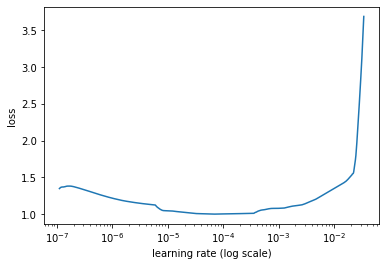

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
hist3 = learner.autofit(5e-5, 5, checkpoint_folder='bert_workshop1')

# hist3 = learner.fit(5e-5, 3, cycle_len=1, cycle_mult=2)
# hist3 = learner.autofit(5e-5, 3, reduce_on_plateau=2, reduce_factor=5)



begin training using triangular learning rate policy with max lr of 5e-05...
Epoch 1/5
411/411 [==============================] - 240s 523ms/step - loss: 1.0215 - accuracy: 0.4649 - val_loss: 1.0265 - val_accuracy: 0.4375
Epoch 2/5
216/411 [==============>...............] - ETA: 1:35 - loss: 1.0042 - accuracy: 0.4788

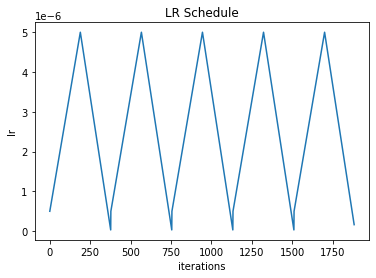

In [ ]:
learner.plot('lr')

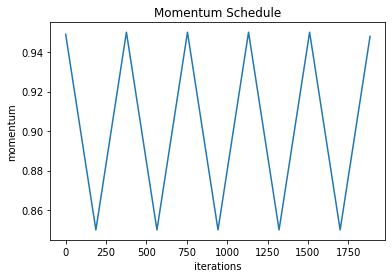

In [ ]:
learner.plot('momentum')

In [ ]:
h1 = go.Scatter(y=hist3.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist3.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist3.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist3.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

load mdoel

In [ ]:
model.load_weights('bert_workshop3/weights-04.hdf5')

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_val, y_val), batch_size=6)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
cat = predictor.get_classes()
cat

['one', 'two', 'three']

In [ ]:
learner.validate(val_data=(x_val, y_val), class_names=cat)

              precision    recall  f1-score   support

         one       0.51      1.00      0.68       150
         two       0.00      0.00      0.00        92
       three       0.00      0.00      0.00        52

    accuracy                           0.51       294
   macro avg       0.17      0.33      0.23       294
weighted avg       0.26      0.51      0.34       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



array([[150,   0,   0],
       [ 92,   0,   0],
       [ 52,   0,   0]])

In [ ]:
predictor.predict_proba('ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี') 

array([0.54001945, 0.32495448, 0.13502613], dtype=float32)

In [ ]:
predictor.predict('ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี')

'one'

In [ ]:
pretrain_name = 'bert_sentiment'

In [ ]:
predictor.save(pretrain_name)

In [ ]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [ ]:
reloaded_predictor.predict('ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี')

เทสกับช้อมูล

In [ ]:
df2 = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,3] ,names=['sentence','level'], header=0)

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
one2_df = df[df2.level == 'one']
one2_df.head()

In [ ]:
print(len(one2_df))

In [ ]:
two2_df = df[df2.level == 'two']
two2_df.head()

In [ ]:
print(len(two2_df))

In [ ]:
three2_df = df[df2.level == 'three']
three2_df.head()

In [ ]:
print(len(three2_df))

In [ ]:
test_df2 = pd.concat([one2_df,two2_df,three2_df])
test_df2.sample(5)

In [ ]:
test_df2.shape

In [ ]:
x_test = test_df2['sentence'].to_list()
x_test[:5]

In [ ]:
y_test = test_df2['level'].to_list()
y_test[:5]

In [ ]:
preds = reloaded_predictor.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, preds)

In [ ]:
cm.shape

In [ ]:
df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
print(classification_report(y_test, preds, target_names=cat, digits=4))